# PFDA Project

### by E. Qejvani
***

## Part 1 - Preparing the dataset.
***

* Uploading the libraries.
* Keeping the information we are interested in.
* Preparing the dataset for analyzing.
    - Checking data types of the coulumns.
    - Checking for empty value cells or NaN value cells.
    - Cleaning the dataset.

In [16]:
# Importing the libraries.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
# Importing project_functions file where I'm storing all the functions to use in this project. 
from project_functions import *         

In [17]:
# Uploading the dataset to my data frame, skipping the first 23 rows as the dataset starts at row 24. 
# Setting low_memory=False - easier to upload in big datasets.
df = pd.read_csv('./data/data_valentia.csv', skiprows=23, low_memory=False)

# Creating a subset using only the data I need for this project.
# Two ways of doing it:
df_valentia = df[['date', 'rain', 'temp', 'wetb', 'dewpt', 'rhum', 'vappr', 'msl', 'wdsp', 'wddir']].copy()
# or:
# df_valentia = df.drop(columns=['ww', 'sun', 'w', 'vis', 'clht', 'clamt', 'ind', 'ind.1', 'ind.2', 'ind.3', 'ind.4']) 

df_valentia.head(5)

,date,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir
0,01-jan-1944 00:00,0.0,9.3,8.3,7.2,86,10.1,1034.3,12,300
1,01-jan-1944 01:00,0.0,8.9,8.2,7.2,90,10.3,1033.9,9,290
2,01-jan-1944 02:00,0.0,9.4,8.1,6.6,83,9.7,1033.4,11,280
3,01-jan-1944 03:00,0.0,9.3,8.3,7.2,86,10.2,1032.8,11,280
4,01-jan-1944 04:00,0.5,8.6,7.8,7.2,89,9.9,1032.4,11,300


### Checking the dataset.

In [18]:
# Information about our dataset.
df_valentia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709320 entries, 0 to 709319
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    709320 non-null  object
 1   rain    709320 non-null  object
 2   temp    709320 non-null  object
 3   wetb    709320 non-null  object
 4   dewpt   709320 non-null  object
 5   rhum    709320 non-null  object
 6   vappr   709320 non-null  object
 7   msl     709320 non-null  object
 8   wdsp    709320 non-null  object
 9   wddir   709320 non-null  object
dtypes: object(10)
memory usage: 54.1+ MB


### Changing the data types in my dataset.

As we can see from the above all data types in the dataset are object type. To change this I am going to:
- Change the date column type to date type data.
- Change the rest of the columns to float type data.
- For both changes I'm creating a function in the `project_functions.py` file.

In [19]:
# 
columns_to_convert = ['rain', 'temp', 'wetb', 'dewpt', 'rhum', 'vappr', 'msl', 'wdsp', 'wddir']
df_valentia = convert_columns_to_float(df_valentia, columns_to_convert)
df_valentia['date'] = pd.to_datetime(df_valentia['date'], format="%d-%b-%Y %H:%M", errors='coerce')

In [20]:
df_valentia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709320 entries, 0 to 709319
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    709320 non-null  datetime64[ns]
 1   rain    709278 non-null  float64       
 2   temp    709260 non-null  float64       
 3   wetb    709260 non-null  float64       
 4   dewpt   709260 non-null  float64       
 5   rhum    709260 non-null  float64       
 6   vappr   709260 non-null  float64       
 7   msl     709260 non-null  float64       
 8   wdsp    709275 non-null  float64       
 9   wddir   709211 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 54.1 MB


In [21]:
df_valentia.head(3)

,date,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir
0,1944-01-01 00:00:00,0.0,9.3,8.3,7.2,86.0,10.1,1034.3,12.0,300.0
1,1944-01-01 01:00:00,0.0,8.9,8.2,7.2,90.0,10.3,1033.9,9.0,290.0
2,1944-01-01 02:00:00,0.0,9.4,8.1,6.6,83.0,9.7,1033.4,11.0,280.0


### Checking if any data is missing - NAN or null values.

In [22]:
# Checking for missing data.
# df_valentia.isnull().sum()
# df_valentia.isna().sum()
# (df_valentia == ' ').sum()

### Checking for single space values `' '`

In Assignment Six of this module, I found out that using `.isna()` and `.isnull()` alone is insufficient for cleaning the dataset. Sometimes, cells can contain an empty value represented by a single space (stored as a string). Therefore, in the next section, I will check for any cells that contain a single space as their value.

### Counting the rows that hold empty cells.

* I created a function in the `project_functions` file that counts all the rows that hold empty cells. 

In [23]:
# calling the funtion from the 'project_functions.py' file.
count_rows_with_empty_or_space_cells_detail(df_valentia)

Rows with 0 empty cells: 709144
Rows with 1 empty cells: 75
Rows with 2 empty cells: 41
Rows with 6 empty cells: 22
Rows with 7 empty cells: 37
Rows with 8 empty cells: 1
Total rows with at least one empty values: 176


176

### Cleaning the rows with empty cells.

* Because of the big size of the dataset (709320 records) I decided to remove all the rows that contain empty cells.
* The total records after removing 176 rows becomes 709144.

In [24]:
df_valentia = remove_rows_with_missing_data(df_valentia)
df_valentia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709144 entries, 0 to 709319
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    709144 non-null  datetime64[ns]
 1   rain    709144 non-null  float64       
 2   temp    709144 non-null  float64       
 3   wetb    709144 non-null  float64       
 4   dewpt   709144 non-null  float64       
 5   rhum    709144 non-null  float64       
 6   vappr   709144 non-null  float64       
 7   msl     709144 non-null  float64       
 8   wdsp    709144 non-null  float64       
 9   wddir   709144 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 59.5 MB


### Converting wind speed to miles per hour.

To convert the wind speed (wdsp) from knots to miles per hour, I will use the conversion factor of 1 knot = 1.15078 miles per hour. In the dataset, wind speed is currently measured in knots, representing the speed of the wind in nautical miles per hour. For my analysis, I need the wind speed expressed in miles per hour. To achieve this, I will create a new column in the df_valentia dataset to store the wind speed values converted to miles per hour.

In [25]:
df_valentia['wdsp_mile/h'] = (df_valentia['wdsp'] * 1.15078).round(1)

In [26]:
df_valentia.head()

,date,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir,wdsp_mile/h
0,1944-01-01 00:00:00,0.0,9.3,8.3,7.2,86.0,10.1,1034.3,12.0,300.0,13.8
1,1944-01-01 01:00:00,0.0,8.9,8.2,7.2,90.0,10.3,1033.9,9.0,290.0,10.4
2,1944-01-01 02:00:00,0.0,9.4,8.1,6.6,83.0,9.7,1033.4,11.0,280.0,12.7
3,1944-01-01 03:00:00,0.0,9.3,8.3,7.2,86.0,10.2,1032.8,11.0,280.0,12.7
4,1944-01-01 04:00:00,0.5,8.6,7.8,7.2,89.0,9.9,1032.4,11.0,300.0,12.7


In [27]:
df_valentia = df_valentia.drop(columns=['wdsp'])
df_valentia.head()

,date,rain,temp,wetb,dewpt,rhum,vappr,msl,wddir,wdsp_mile/h
0,1944-01-01 00:00:00,0.0,9.3,8.3,7.2,86.0,10.1,1034.3,300.0,13.8
1,1944-01-01 01:00:00,0.0,8.9,8.2,7.2,90.0,10.3,1033.9,290.0,10.4
2,1944-01-01 02:00:00,0.0,9.4,8.1,6.6,83.0,9.7,1033.4,280.0,12.7
3,1944-01-01 03:00:00,0.0,9.3,8.3,7.2,86.0,10.2,1032.8,280.0,12.7
4,1944-01-01 04:00:00,0.5,8.6,7.8,7.2,89.0,9.9,1032.4,300.0,12.7


In [28]:
df_valentia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709144 entries, 0 to 709319
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         709144 non-null  datetime64[ns]
 1   rain         709144 non-null  float64       
 2   temp         709144 non-null  float64       
 3   wetb         709144 non-null  float64       
 4   dewpt        709144 non-null  float64       
 5   rhum         709144 non-null  float64       
 6   vappr        709144 non-null  float64       
 7   msl          709144 non-null  float64       
 8   wddir        709144 non-null  float64       
 9   wdsp_mile/h  709144 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 59.5 MB


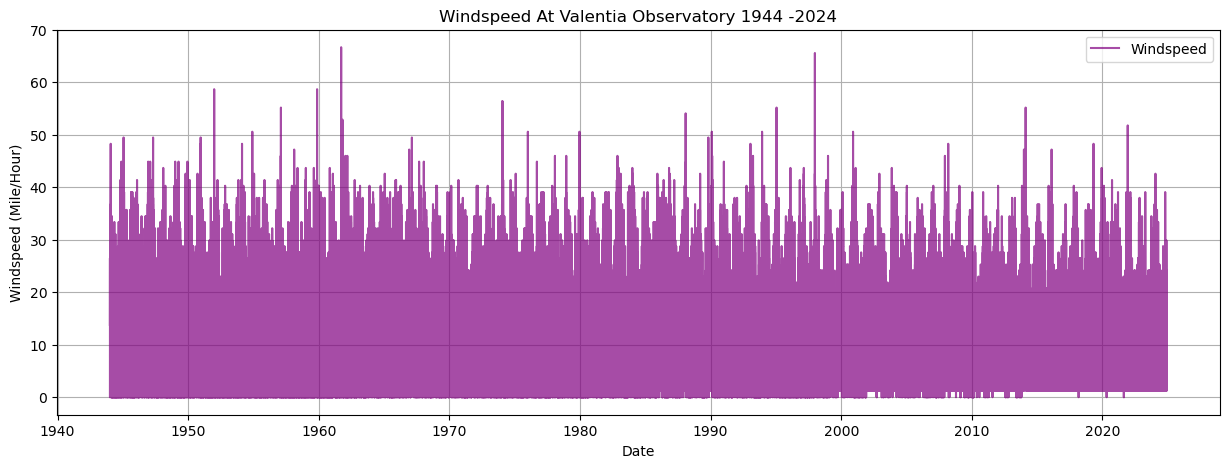

In [29]:
# Plotting the Windspeed over time.
plt.figure(figsize=(15, 5))
plt.plot(df_valentia['date'], df_valentia['wdsp_mile/h'], label='Windspeed', color='purple', alpha=0.7)
plt.title('Windspeed At Valentia Observatory 1944 -2024')
plt.xlabel('Date')
plt.ylabel('Windspeed (Mile/Hour)')
plt.legend()
plt.grid(True)
plt.show()

### Correlation between wind and other data

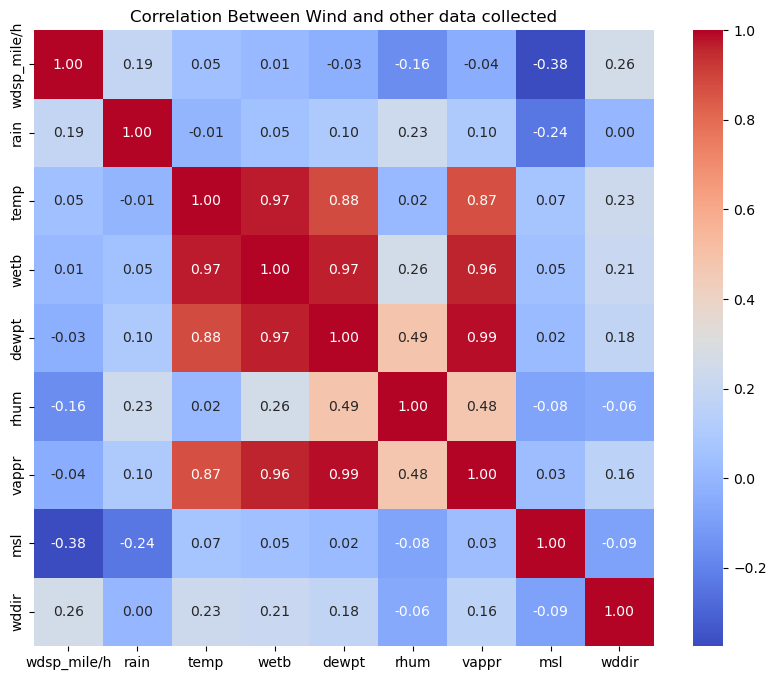

In [30]:
# Selecting columns to for correlation analysis between wind and other information we have.
selected_columns = ['wdsp_mile/h','rain', 'temp', 'wetb', 'dewpt', 'rhum', 'vappr', 'msl', 'wddir']
correlation_df = df_valentia[selected_columns]

# Calculating the correlation matrix
correlation_matrix = correlation_df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Wind and other data collected')
plt.show()